In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score

import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import LSTM, GRU, Dense
from keras.metrics import MeanAbsoluteError

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
# 0 - oil
# 1 - water
# 2 - bhp
data = np.load("Data/lstm_data.npy")
data.shape

(4228, 30, 3)

In [6]:
X, y = data[:, :24, :], data[:, 24:]
y = y[:, :, 0]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

In [7]:
X.shape, y.shape

((4228, 24, 3), (4228, 6))

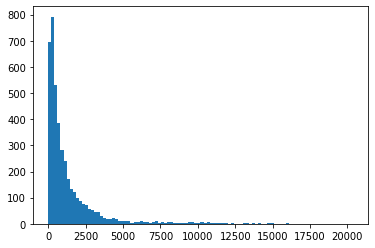

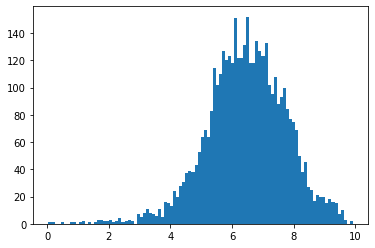

In [27]:
plt.hist(y[:, 0], bins=100)
plt.show()
plt.hist(np.log(y[:, 0] + 1), bins=100)
plt.show()

After log transform target variable became almost normally distributed. Therefore it's more practical to use MSLE loss here.

For quality metric we wanted to take something easier to interpret as MSLE. Such percentage errors like MAPE doesn't suit because there are some close-to-zero flows. So we used MAE thought it's not quite good because of different orders of flow rates in different wells.

In [8]:
# choose a number of time steps
n_steps_in, n_steps_out = X.shape[1], y.shape[1] # = 24, 6
n_hidden = 15
n_features = X.shape[2] # = 3

In [7]:
# define model
model = Sequential()
model.add(LSTM(n_hidden, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(Dense(n_steps_out))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='msle', metrics=[MeanAbsoluteError()])

history = model.fit(xtrain, ytrain, epochs=500, batch_size=32, 
                    validation_data=(xtest, ytest))

Epoch 1/500
106/106 [==============================] - 2s 10ms/step - loss: 21.5453 - mean_absolute_error: 1405.0343 - val_loss: 19.5727 - val_mean_absolute_error: 1457.3225
Epoch 2/500
106/106 [==============================] - 1s 8ms/step - loss: 17.8123 - mean_absolute_error: 1411.6372 - val_loss: 16.2533 - val_mean_absolute_error: 1418.9473
Epoch 3/500
106/106 [==============================] - 1s 8ms/step - loss: 14.7792 - mean_absolute_error: 1314.5513 - val_loss: 14.6167 - val_mean_absolute_error: 1329.4192
Epoch 4/500
106/106 [==============================] - 1s 8ms/step - loss: 14.0615 - mean_absolute_error: 1274.7218 - val_loss: 13.7129 - val_mean_absolute_error: 1249.3835
Epoch 5/500
106/106 [==============================] - 1s 8ms/step - loss: 12.7061 - mean_absolute_error: 1181.2858 - val_loss: 13.0824 - val_mean_absolute_error: 1204.2341
Epoch 6/500
106/106 [==============================] - 1s 9ms/step - loss: 12.9397 - mean_absolute_error: 1175.1643 - val_loss: 12.557

106/106 [==============================] - 1s 8ms/step - loss: 0.8550 - mean_absolute_error: 603.3665 - val_loss: 0.7286 - val_mean_absolute_error: 619.3263
Epoch 50/500
106/106 [==============================] - 1s 8ms/step - loss: 0.8269 - mean_absolute_error: 579.5438 - val_loss: 0.7180 - val_mean_absolute_error: 603.3910
Epoch 51/500
106/106 [==============================] - 1s 8ms/step - loss: 0.8202 - mean_absolute_error: 563.3842 - val_loss: 0.7010 - val_mean_absolute_error: 594.7734
Epoch 52/500
106/106 [==============================] - 1s 8ms/step - loss: 0.7731 - mean_absolute_error: 567.8607 - val_loss: 0.7108 - val_mean_absolute_error: 611.0107
Epoch 53/500
106/106 [==============================] - 1s 8ms/step - loss: 0.7781 - mean_absolute_error: 557.4775 - val_loss: 0.7162 - val_mean_absolute_error: 627.1899
Epoch 54/500
106/106 [==============================] - 1s 8ms/step - loss: 0.7331 - mean_absolute_error: 559.4830 - val_loss: 0.6676 - val_mean_absolute_error: 60

106/106 [==============================] - 3s 26ms/step - loss: 0.6454 - mean_absolute_error: 434.6170 - val_loss: 0.5654 - val_mean_absolute_error: 512.2064
Epoch 98/500
106/106 [==============================] - 2s 22ms/step - loss: 0.6636 - mean_absolute_error: 433.1182 - val_loss: 0.5578 - val_mean_absolute_error: 502.3439
Epoch 99/500
106/106 [==============================] - 2s 19ms/step - loss: 0.6818 - mean_absolute_error: 436.4054 - val_loss: 0.5734 - val_mean_absolute_error: 492.6393
Epoch 100/500
106/106 [==============================] - 2s 23ms/step - loss: 0.6679 - mean_absolute_error: 430.0273 - val_loss: 0.5660 - val_mean_absolute_error: 491.1375
Epoch 101/500
106/106 [==============================] - 2s 23ms/step - loss: 0.6624 - mean_absolute_error: 430.4490 - val_loss: 0.5559 - val_mean_absolute_error: 499.0844
Epoch 102/500
106/106 [==============================] - 2s 20ms/step - loss: 0.6777 - mean_absolute_error: 425.5357 - val_loss: 0.5562 - val_mean_absolute_

Epoch 145/500
106/106 [==============================] - 1s 11ms/step - loss: 0.5261 - mean_absolute_error: 324.5339 - val_loss: 0.4366 - val_mean_absolute_error: 340.6230
Epoch 146/500
106/106 [==============================] - 1s 12ms/step - loss: 0.5224 - mean_absolute_error: 321.6263 - val_loss: 0.4326 - val_mean_absolute_error: 330.3180
Epoch 147/500
106/106 [==============================] - 1s 13ms/step - loss: 0.5193 - mean_absolute_error: 313.9795 - val_loss: 0.4304 - val_mean_absolute_error: 326.6789
Epoch 148/500
106/106 [==============================] - 1s 12ms/step - loss: 0.5218 - mean_absolute_error: 309.5555 - val_loss: 0.4368 - val_mean_absolute_error: 329.1091
Epoch 149/500
106/106 [==============================] - 1s 12ms/step - loss: 0.5183 - mean_absolute_error: 310.6896 - val_loss: 0.4365 - val_mean_absolute_error: 321.6574
Epoch 150/500
106/106 [==============================] - 1s 12ms/step - loss: 0.5099 - mean_absolute_error: 303.3846 - val_loss: 0.4819 - va

KeyboardInterrupt: 

Gradient descend here has unstable convergence. We have to restart these cells several times we got these values. 

Also we needed to stop ```model.fit``` and then continue with less learning rate. May be it would be better to tune lr scheduler based on loss function value. But still we would have to rerun cells several times because of unstable convergence.

In [8]:
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)
model.compile(optimizer=optimizer, loss='msle', metrics=[MeanAbsoluteError()])
history = model.fit(xtrain, ytrain, epochs=500, batch_size=32, 
                    validation_data=(xtest, ytest))

Epoch 1/500
106/106 [==============================] - 2s 10ms/step - loss: 0.4739 - mean_absolute_error: 261.2194 - val_loss: 0.3845 - val_mean_absolute_error: 257.0904
Epoch 2/500
106/106 [==============================] - 1s 8ms/step - loss: 0.4694 - mean_absolute_error: 259.0786 - val_loss: 0.3851 - val_mean_absolute_error: 257.1794
Epoch 3/500
106/106 [==============================] - 1s 10ms/step - loss: 0.4689 - mean_absolute_error: 257.9054 - val_loss: 0.3898 - val_mean_absolute_error: 260.1755
Epoch 4/500
106/106 [==============================] - 1s 11ms/step - loss: 0.4680 - mean_absolute_error: 258.9831 - val_loss: 0.3835 - val_mean_absolute_error: 255.7390
Epoch 5/500
106/106 [==============================] - 1s 11ms/step - loss: 0.4642 - mean_absolute_error: 257.8498 - val_loss: 0.3835 - val_mean_absolute_error: 254.7977
Epoch 6/500
106/106 [==============================] - 1s 10ms/step - loss: 0.4644 - mean_absolute_error: 257.2953 - val_loss: 0.3837 - val_mean_absolu

KeyboardInterrupt: 

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss='msle', metrics=[MeanAbsoluteError()])
history = model.fit(xtrain, ytrain, epochs=500, validation_data=(xtest, ytest))

Epoch 1/500
106/106 [==============================] - 2s 10ms/step - loss: 0.4753 - mean_absolute_error: 257.5993 - val_loss: 0.3928 - val_mean_absolute_error: 256.6762
Epoch 2/500
106/106 [==============================] - 1s 8ms/step - loss: 0.4769 - mean_absolute_error: 257.5302 - val_loss: 0.3900 - val_mean_absolute_error: 256.2239
Epoch 3/500
106/106 [==============================] - 1s 8ms/step - loss: 0.4759 - mean_absolute_error: 256.9781 - val_loss: 0.3895 - val_mean_absolute_error: 255.6931
Epoch 4/500
106/106 [==============================] - 1s 9ms/step - loss: 0.4782 - mean_absolute_error: 255.9647 - val_loss: 0.3880 - val_mean_absolute_error: 254.8866
Epoch 5/500
106/106 [==============================] - 1s 8ms/step - loss: 0.4760 - mean_absolute_error: 255.5567 - val_loss: 0.3877 - val_mean_absolute_error: 254.1042
Epoch 6/500
106/106 [==============================] - 1s 9ms/step - loss: 0.4709 - mean_absolute_error: 255.6092 - val_loss: 0.3897 - val_mean_absolute_e

106/106 [==============================] - 1s 11ms/step - loss: 0.4446 - mean_absolute_error: 257.1706 - val_loss: 0.4049 - val_mean_absolute_error: 255.6863
Epoch 50/500
106/106 [==============================] - 1s 10ms/step - loss: 0.4438 - mean_absolute_error: 255.9335 - val_loss: 0.4052 - val_mean_absolute_error: 254.8339
Epoch 51/500
106/106 [==============================] - 1s 11ms/step - loss: 0.4439 - mean_absolute_error: 254.9122 - val_loss: 0.4052 - val_mean_absolute_error: 254.9334
Epoch 52/500
106/106 [==============================] - 1s 10ms/step - loss: 0.4437 - mean_absolute_error: 254.6366 - val_loss: 0.4055 - val_mean_absolute_error: 255.0653
Epoch 53/500
106/106 [==============================] - 1s 10ms/step - loss: 0.4436 - mean_absolute_error: 255.0393 - val_loss: 0.4058 - val_mean_absolute_error: 255.1982
Epoch 54/500
106/106 [==============================] - 1s 9ms/step - loss: 0.4435 - mean_absolute_error: 255.1935 - val_loss: 0.4057 - val_mean_absolute_erro

KeyboardInterrupt: 

Best values for validation (epoch 24 on 3rd restart):

```MSLE = 0.3861```

```MAE = 252.227```

Now look at some predictions

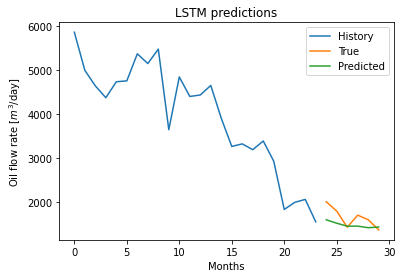

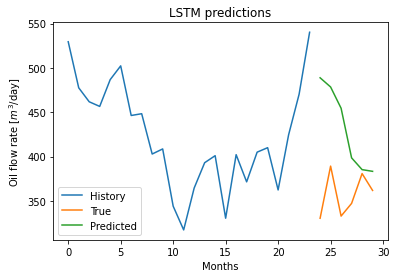

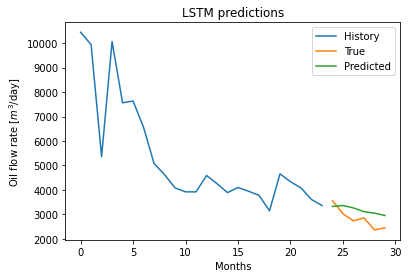

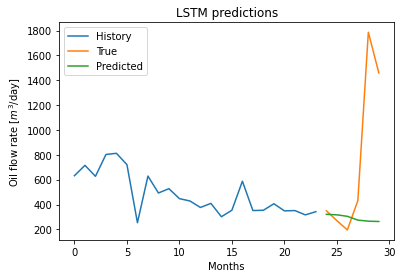

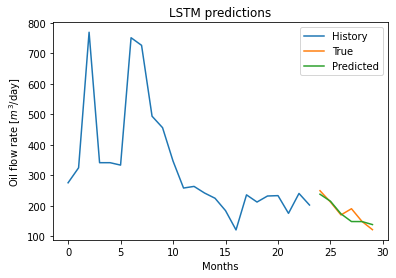

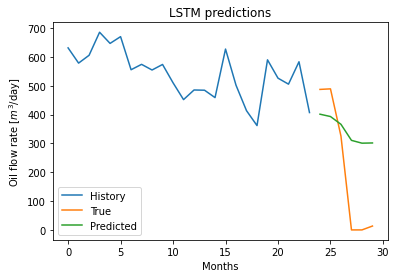

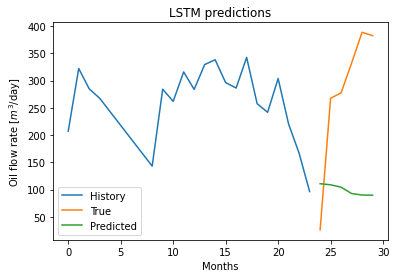

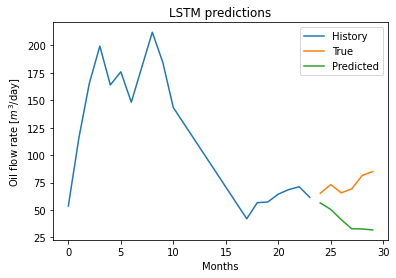

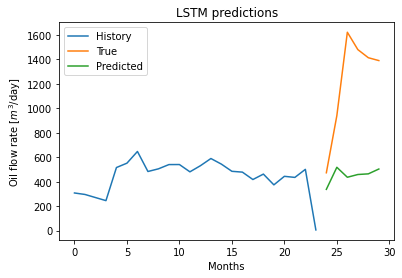

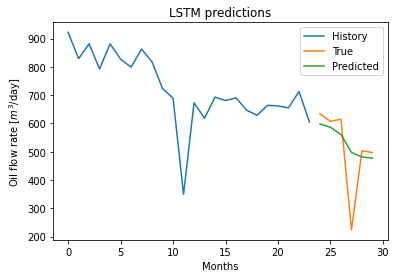

In [13]:
# 1 lstm, hidden = 15
ypred = model.predict(xtest)
ypred.shape
for i in range(10):
    plt.plot(list(range(n_steps_in)), xtest[i, :, 0], label="History")
    plt.plot(list(range(n_steps_in, n_steps_in + n_steps_out)), ytest[i], 
             label="True")
    plt.plot(list(range(n_steps_in, n_steps_in + n_steps_out)), ypred[i],
            label="Predicted")
    plt.xlabel("Months")
    plt.ylabel("Oil flow rate [$m^3$/day]")
    plt.title("LSTM predictions")
    plt.legend()
    plt.show()

In [16]:
r2_score(ytest, ypred)

0.924621423005563

Quite good score

In [ ]:
model.save("Models/LSTM_Multivariate")

In [12]:
# model = load_model("Models/LSTM_Multivariate")

In [11]:
# Save predictions
ypredfull = model.predict(X)
pd.DataFrame(ypredfull).to_csv("Data/Predictions.csv")

In [14]:
# Save hidden units for each sample
model_hidden = Sequential()
model_hidden.add(LSTM(n_hidden, activation='relu',
               input_shape=(n_steps_in, n_features)))

model_hidden.set_weights(model.layers[0].weights)
hidden = np.array(model_hidden(X))
np.save("Data/hidden.npy", hidden)